# To Explore Business Analytics

Perform ‘Exploratory Data Analysis’ on the ‘SampleSuperstore’ dataset

### Task - You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

Click here for dataset :- https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
# load dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# object will provide categorical info.
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [7]:
df.groupby(['Ship Mode','Segment'])['Sales'].mean()

Ship Mode       Segment    
First Class     Consumer       206.981749
                Corporate      218.264886
                Home Office    304.228831
Same Day        Consumer       191.155707
                Corporate      395.801079
                Home Office    202.191455
Second Class    Consumer       226.959755
                Corporate      239.944234
                Home Office    258.128421
Standard Class  Consumer       230.190299
                Corporate      225.739810
                Home Office    223.191537
Name: Sales, dtype: float64

In [8]:
df.groupby(['Segment','Category'])['Profit'].mean()

Segment      Category       
Consumer     Furniture           6.281293
             Office Supplies    18.014174
             Technology         74.445646
Corporate    Furniture          11.741201
             Office Supplies    22.102923
             Technology         79.723823
Home Office  Furniture          10.705465
             Office Supplies    24.034439
             Technology         89.152458
Name: Profit, dtype: float64

#### Conclusion:- For Furniture category average profit is not more than 10($), which is less as compared to other category like Office Supplies and Technology. 

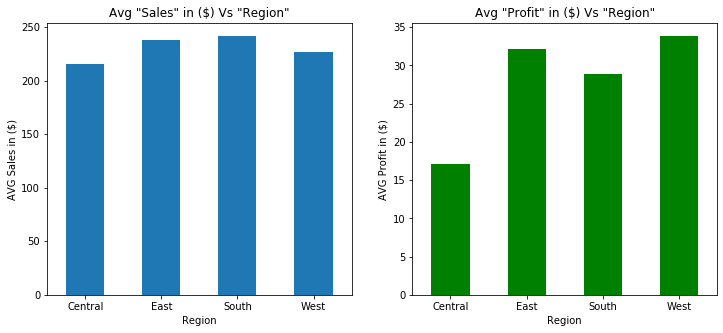

In [9]:
# We will see Region wise avg sales & profit.
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df.groupby('Region')['Sales'].mean().plot(kind = 'bar')
plt.xticks(rotation =0)
plt.ylabel('AVG Sales in ($)')
plt.title('Avg "Sales" in ($) Vs "Region"')

plt.subplot(1,2,2)
df.groupby('Region')['Profit'].mean().plot(kind = 'bar',color = 'green')
plt.xticks(rotation =0)
plt.ylabel('AVG Profit in ($)')
plt.title('Avg "Profit" in ($) Vs "Region"')
plt.show()

#### Conclusion : - 
1. From graph we can see that, overall performance of "Central" region is low.
2. For South region Avg Sales is high but the profit margin is low as compared to other. 

In [10]:
df.groupby(['Region','Category'])['Profit'].mean()

Region   Category       
Central  Furniture          -5.968918
         Office Supplies     6.244712
         Technology         80.231981
East     Furniture           5.068496
         Office Supplies    23.957114
         Technology         88.714084
South    Furniture          20.395199
         Office Supplies    20.086827
         Technology         68.231506
West     Furniture          16.272914
         Office Supplies    27.733183
         Technology         73.962687
Name: Profit, dtype: float64

### Region wise Data Seperation 

In [11]:
# We will slice the data region wise to get proper result. 
dc=df[df.Region=='Central']

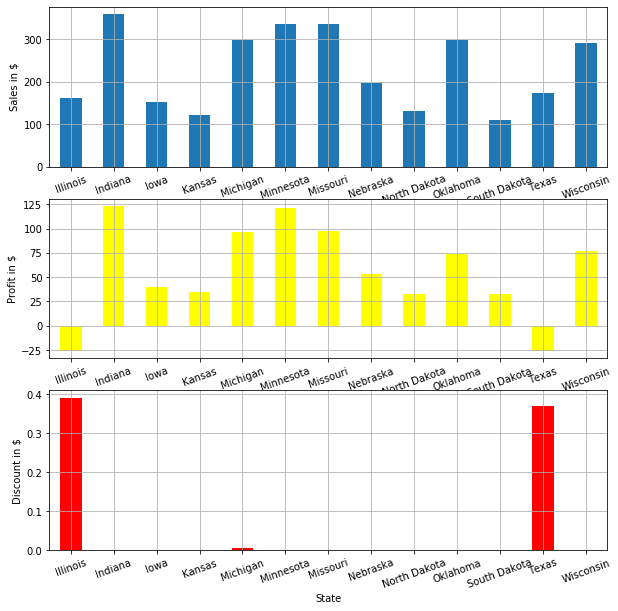

In [12]:
# plot bar graph to see State wise performance.
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
dc.groupby(['State'])['Sales'].mean().plot(kind = 'bar')
plt.ylabel('Sales in $')
plt.xticks(Rotation = 20)
plt.grid()

plt.subplot(3,1,2)
dc.groupby(['State'])['Profit'].mean().plot(kind = 'bar',color = 'yellow')
plt.ylabel('Profit in $')
plt.xticks(Rotation = 20)
plt.grid()

plt.subplot(3,1,3)
dc.groupby(['State'])['Discount'].mean().plot(kind = 'bar',color = 'red')
plt.ylabel('Discount in $')
plt.xticks(Rotation = 20)
plt.grid()
plt.show()

### Conclusion :- In state 'Illinois' & 'Texas' they both are giving discount on product, thats why the profit graph is down ie. they are making loss in both the state. 

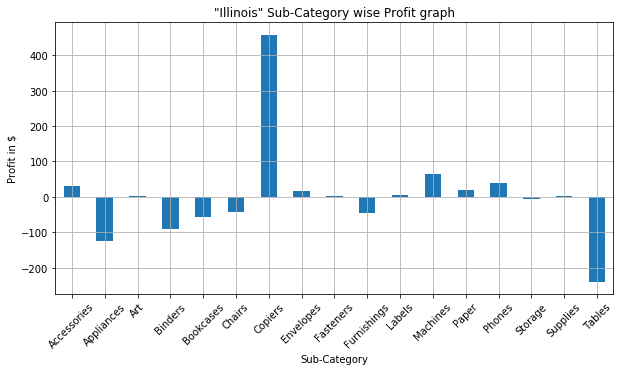

In [13]:
# Now, we'll see the 'Sub-Category' wise loss in both state. 
plt.figure(figsize=(10,5))
dc[dc.State=='Illinois'].groupby('Sub-Category')['Profit'].mean().plot(kind='bar')
plt.xticks(rotation = 45)
plt.ylabel('Profit in $')
plt.title('"Illinois" Sub-Category wise Profit graph')
plt.grid()
plt.show()

### Conclusion : -
1. Most of the losses in 'Illinois' State is from 'Furniture' Category.  
2. Other losses from 'Sub-Category' like Appliances,Binders and Storage. 

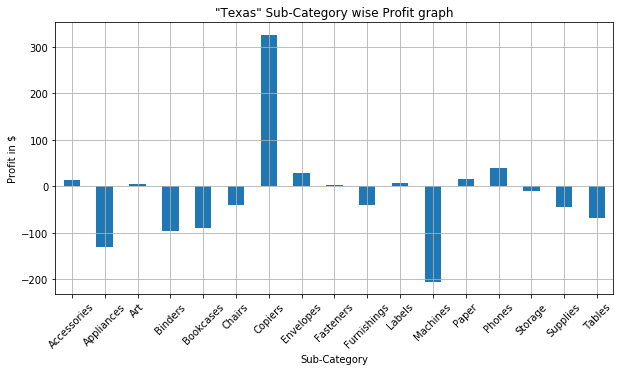

In [14]:
plt.figure(figsize=(10,5))
dc[dc.State=='Texas'].groupby('Sub-Category')['Profit'].mean().plot(kind='bar')
plt.xticks(rotation = 45)
plt.ylabel('Profit in $')
plt.title('"Texas" Sub-Category wise Profit graph')
plt.grid()
plt.show()

### Conclusion :- 
 1. For 'Texas' most of the losses from 'Sub-category' like Machines, Appliances,Binders and Bookcases. 
 2. Here we can also see that the furniture category loss is present. 

In [15]:
# we'll go for South region. 
ds=df[df.Region=='South']

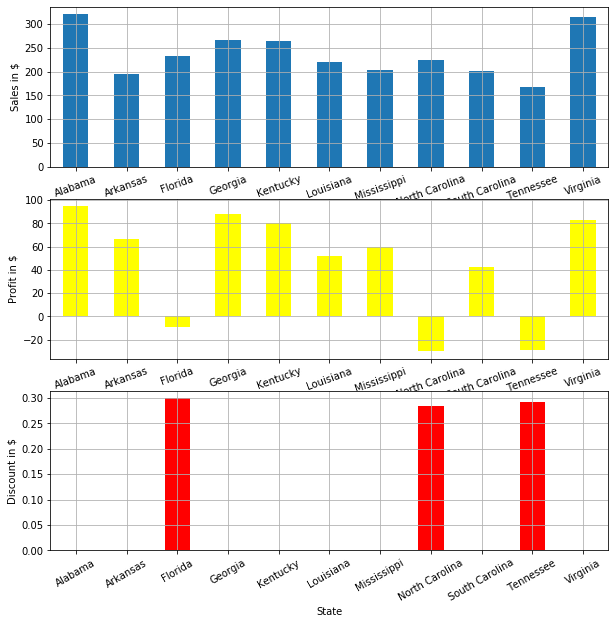

In [16]:
# plot bar graph to see state wise sales, profit and discount margin.
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
ds.groupby(['State'])['Sales'].mean().plot(kind = 'bar')
plt.ylabel('Sales in $')
plt.xticks(Rotation = 20)
plt.grid()

plt.subplot(3,1,2)
ds.groupby(['State'])['Profit'].mean().plot(kind = 'bar',color = 'yellow')
plt.ylabel('Profit in $')
plt.xticks(Rotation = 20)
plt.grid()

plt.subplot(3,1,3)
ds.groupby(['State'])['Discount'].mean().plot(kind = 'bar',color = 'red')
plt.ylabel('Discount in $')
plt.xticks(Rotation = 30)
plt.grid()
plt.show()

### Due to discount the profit margin for the state Florida, North Carolina and Tennessee are down i.e. on negative axis. 

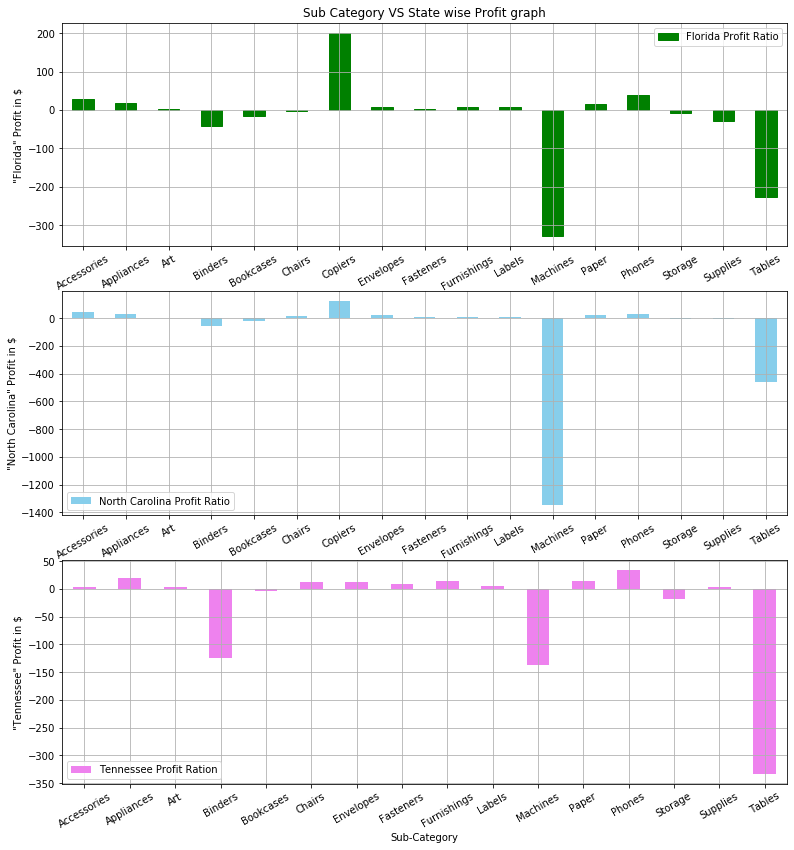

In [17]:
# Now, we'll see Sub-Category wise profit graph to get proper insights.  
plt.figure(figsize=(13,14))

plt.subplot(3,1,1)
plt.title('Sub Category VS State wise Profit graph')
ds[ds.State=='Florida'].groupby('Sub-Category')['Profit'].mean().plot(kind='bar',Color='green')
plt.xticks(rotation = 30)
plt.ylabel('"Florida" Profit in $')
plt.legend(['Florida Profit Ratio'])
plt.grid()

plt.subplot(3,1,2)
ds[ds.State=='North Carolina'].groupby('Sub-Category')['Profit'].mean().plot(kind='bar', color = 'Skyblue')
plt.xticks(rotation = 30)
plt.ylabel('"North Carolina" Profit in $')
plt.legend(['North Carolina Profit Ratio'])

plt.grid()

plt.subplot(3,1,3)
ds[ds.State=='Tennessee'].groupby('Sub-Category')['Profit'].mean().plot(kind='bar',color = 'Violet')
plt.xticks(rotation = 30)
plt.ylabel('"Tennessee" Profit in $')
plt.legend(['Tennessee Profit Ration'])
plt.grid()
plt.show()

### For three of them most of the profit loss is from Machines, Tables and Binders.

# Final Conclusion :-
1. Region wise we can say that Centarl region where  we have to work on to increase in Sales as well as Profit and work on discount scheme to grab market. 
2. In South region the we have seen that the average Sales ratio is highest as compared to other, but the Profit margin is too low due to some discount scheme.
3. From above graph we have seen that 'Furniture' Category and 'Machine' Sub-Category is the weak area where we can work on to make more profit. 